In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the modules
import numpy as np
import pandas as pd
import tensorflow as tf
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

---

### Read the data from the drive folder into a Pandas DataFrame.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mydata.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,2,0,0,0,0,0,0,1,1,70,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,1,0,1,0,0,0,1,0,1,70,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,1,1,0,0,0,0,1,0,1,60,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,1,1,1,0,0,0,1,0,0,75,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,1,0,0,0,0,0,0,0,0,80,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [ ]:
df["General_Health"].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [ ]:
df['General_Health'] = df['General_Health'].replace({'Poor':0,'Fair':1,'Good':2,'Very Good':3,'Excellent':4})
df['General_Health'].value_counts()

3    110351
2     95355
4     55929
1     35808
0     11331
Name: General_Health, dtype: int64

In [ ]:
# df = pd.get_dummies(df, columns=['Age_Category'], dtype= 'int64')

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,2,0,0,0,0,0,0,1,1,70,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,1,0,1,0,0,0,1,0,1,70,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,1,1,0,0,0,0,1,0,1,60,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,1,1,1,0,0,0,1,0,0,75,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,1,0,0,0,0,0,0,0,0,80,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308774 entries, 0 to 308773
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308774 non-null  int64  
 1   Checkup                       308774 non-null  int64  
 2   Exercise                      308774 non-null  int64  
 3   Heart_Disease                 308774 non-null  int64  
 4   Skin_Cancer                   308774 non-null  int64  
 5   Other_Cancer                  308774 non-null  int64  
 6   Depression                    308774 non-null  int64  
 7   Diabetes                      308774 non-null  int64  
 8   Arthritis                     308774 non-null  int64  
 9   Sex                           308774 non-null  int64  
 10  Age_Category                  308774 non-null  int64  
 11  Height_(cm)                   308774 non-null  float64
 12  Weight_(kg)                   308774 non-nul

# Fix unbalance of data

In [ ]:
df['Heart_Disease'].value_counts()

0    283803
1     24971
Name: Heart_Disease, dtype: int64

In [ ]:
heart_0 = df[df['Heart_Disease']==0].sample(24971, random_state=10)
heart_1 = df[df['Heart_Disease']==1]

heart_balanced = pd.concat([heart_0, heart_1])

heart_balanced['Heart_Disease'].value_counts()

0    24971
1    24971
Name: Heart_Disease, dtype: int64

# Features and Labels

In [ ]:
# Separate the data into labels and features
features = heart_balanced.drop("Heart_Disease", axis=1)
labels  = heart_balanced["Heart_Disease"]

# Separate the y variable, the labels
y = labels
print(y.shape[0])

# Separate the X variable, the features
X = features
print(X.shape[0])

49942
49942


In [ ]:
# Review the y variable Series
print(y)

229397    0
284662    0
176975    0
26335     0
208371    0
         ..
308699    1
308720    1
308723    1
308729    1
308760    1
Name: Heart_Disease, Length: 49942, dtype: int64


In [ ]:
# Review the X variable DataFrame
print(X)

        General_Health  Checkup  Exercise  Skin_Cancer  Other_Cancer  \
229397               3       10         0            0             0   
284662               2        1         1            0             0   
176975               3        2         1            1             0   
26335                4        2         1            0             0   
208371               3        0         1            0             0   
...                ...      ...       ...          ...           ...   
308699               3        1         0            0             0   
308720               2        1         1            0             0   
308723               1        1         1            0             0   
308729               2        1         0            0             1   
308760               3        1         1            0             0   

        Depression  Diabetes  Arthritis  Sex  Age_Category  Height_(cm)  \
229397           1         0          0    0            30  

### Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [ ]:
# Check the balance of our target values
y.value_counts()

0    24971
1    24971
Name: Heart_Disease, dtype: int64

### Split the data into training and testing datasets by using `train_test_split`.

In [ ]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (37456, 18)
X_test shape: (12486, 18)
y_train shape: (37456,)
y_test shape: (12486,)


---

# Standarize the data

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Only standarize certain columns

In [ ]:
# X_train[['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']] = StandardScaler().fit_transform(X_train[['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']])
# X_test[['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']] = StandardScaler().fit_transform(X_test[['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']])

## Create a Logistic Regression Model with the Standarize Data

0.761092423514336
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      6243
           1       0.75      0.78      0.77      6243

    accuracy                           0.76     12486
   macro avg       0.76      0.76      0.76     12486
weighted avg       0.76      0.76      0.76     12486



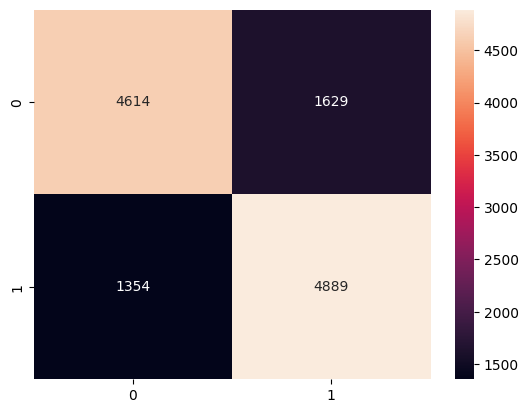

In [ ]:
model = LogisticRegression(random_state=10)
model.fit(X_train_scaled, y_train)
print(model.score(X_test_scaled, y_test))

#

cnf = confusion_matrix(y_test, model.predict(X_test_scaled))
sns.heatmap(cnf, annot=True, fmt='.0f')

print(classification_report(y_test, model.predict(X_test_scaled)))

# Neural Network Model

In [ ]:
X_train_scaled.shape[1]

18

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=20, input_dim=X_train_scaled.shape[1], activation='tanh'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation='tanh'))

# Third hidden layer
# nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 20)                380       
                                                                 
 dense_97 (Dense)            (None, 10)                210       
                                                                 
 dense_98 (Dense)            (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
# Train the model
nn.fit(X_train_scaled, y_train,epochs=20)

Epoch 1/20
1171/1171 [==============================] - 5s 3ms/step - loss: 0.5164 - accuracy: 0.7492
Epoch 2/20
1171/1171 [==============================] - 3s 2ms/step - loss: 0.5021 - accuracy: 0.7593
Epoch 3/20
1171/1171 [==============================] - 3s 2ms/step - loss: 0.5000 - accuracy: 0.7615
Epoch 4/20
1171/1171 [==============================] - 2s 2ms/step - loss: 0.4988 - accuracy: 0.7623
Epoch 5/20
1171/1171 [==============================] - 3s 3ms/step - loss: 0.4976 - accuracy: 0.7618
Epoch 6/20
1171/1171 [==============================] - 3s 2ms/step - loss: 0.4968 - accuracy: 0.7641
Epoch 7/20
1171/1171 [==============================] - 2s 2ms/step - loss: 0.4962 - accuracy: 0.7636
Epoch 8/20
1171/1171 [==============================] - 2s 2ms/step - loss: 0.4958 - accuracy: 0.7622
Epoch 9/20
1171/1171 [==============================] - 2s 2ms/step - loss: 0.4952 - accuracy: 0.7640
Epoch 10/20
1171/1171 [==============================] - 2s 2ms/step - loss: 0.494

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

391/391 - 1s - loss: 0.5030 - accuracy: 0.7563 - 999ms/epoch - 3ms/step
Loss: 0.5029661059379578, Accuracy: 0.7562870383262634


# Decision Tree

0.7314592343424635
              precision    recall  f1-score   support

           0       0.80      0.62      0.70      6243
           1       0.69      0.85      0.76      6243

    accuracy                           0.73     12486
   macro avg       0.74      0.73      0.73     12486
weighted avg       0.74      0.73      0.73     12486



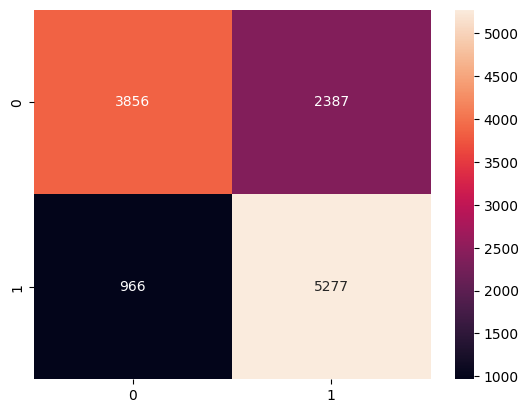

In [ ]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train_scaled, y_train)
print(tree.score(X_test_scaled, y_test))

#

cnf = confusion_matrix(y_test, tree.predict(X_test_scaled))
sns.heatmap(cnf, annot=True, fmt='.0f')

print(classification_report(y_test, tree.predict(X_test_scaled)))

# Support Vector Machines

0.6735543809066155
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      6243
           1       0.67      0.67      0.67      6243

    accuracy                           0.67     12486
   macro avg       0.67      0.67      0.67     12486
weighted avg       0.67      0.67      0.67     12486



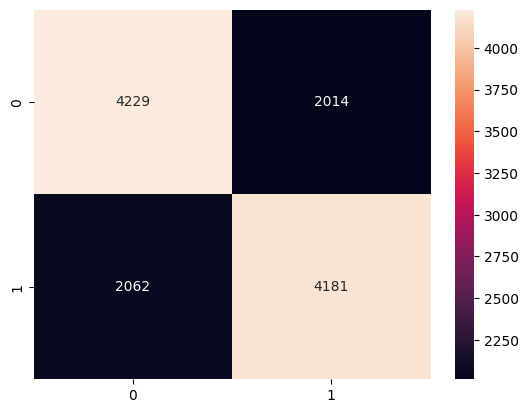

In [ ]:
# Model - Support Vector Classificator
svc = SVC(C=1.5, kernel='sigmoid')
svc.fit(X_train_scaled, y_train)
print(svc.score(X_test_scaled, y_test))

cnf = confusion_matrix(y_test, svc.predict(X_test_scaled))
sns.heatmap(cnf, annot=True, fmt='.0f')

print(classification_report(y_test, svc.predict(X_test_scaled)))

# Random Forest

0.7534839019702066
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      6243
           1       0.74      0.79      0.76      6243

    accuracy                           0.75     12486
   macro avg       0.75      0.75      0.75     12486
weighted avg       0.75      0.75      0.75     12486



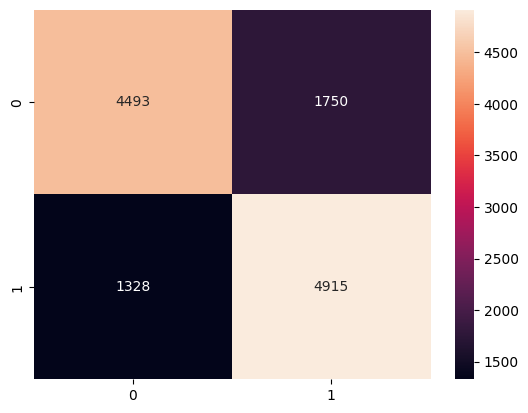

In [ ]:
# Model - Support Vector Classificator
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

#

cnf = confusion_matrix(y_test, forest.predict(X_test))
sns.heatmap(cnf, annot=True, fmt='.0f')

print(classification_report(y_test, forest.predict(X_test)))